## **Support Vector Machine**


Support Vector Machine (SVM)
A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems.

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

<img src="https://miro.medium.com/max/300/0*9jEWNXTAao7phK-5.png"> 

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

<img src = "https://miro.medium.com/max/300/0*0o8xIA4k3gXUDCFU.png">

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

<img src="https://miro.medium.com/max/700/0*ecA4Ls8kBYSM5nza.jpg">


## **Import necessary libraries to  get started with SVM Classification**

In [4]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## **Loading digits dataset**

In [8]:
digits = datasets.load_digits()
# print(digits)

In [10]:
# print(digits[0])
print(type(digits))

<class 'sklearn.utils.Bunch'>


In [18]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [21]:
# digits.DESCR

In [32]:
# digits.data
# digits.data.shape

In [27]:
# digits.feature_names

In [30]:
# digits.frame

In [35]:
# digits.images
digits.images.shape

(1797, 8, 8)

In [36]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [22]:
images_and_labels = list(zip(digits.images , digits.target))

In [37]:
print(images_and_labels[0])

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), 0)


In [38]:
# digits.images

In [13]:
digits.images.shape

(1797, 8, 8)

In [14]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [15]:
digits.target.shape

(1797,)

In [40]:
type(digits.images)

numpy.ndarray

## **Flattening the Images**

To apply a classifier on this data, we need to flatten the images to turn the data into (samples, features) matrix.

In [60]:
a = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
# a.reshape(2,2,2,2).shape
b = a.reshape(2,2,2,2)
b = b.reshape(16, -1)
# b.shape
# print(b)

In [61]:
n_samples = len(digits.images)
# print(n_samples)
data = digits.images.reshape((n_samples, -1))

In [63]:
data
# data.shape

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [150]:
# dir(svm)
# dir(svm.SVC())

## **Training the Model**

We are using SVM model as imported from sklearn library and then it's being trained on 75% of the digits.

In [109]:
#Fetching training set, 75% of entire dataset, rest will be used for testing

trainTestSplit = int(n_samples*0.75)

#Training the model
model = svm.SVC()
model.fit(data[:trainTestSplit], digits.target[:trainTestSplit])


SVC()

# Predict and evaluate model performance

In [110]:
target = digits.target[trainTestSplit:]
predictions = model.predict(data[trainTestSplit:])

In [111]:
print(confusion_matrix(target,predictions))
print(accuracy_score(target,predictions))

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  2  0  2  6  0]
 [ 0  0  0  0 45  0  0  0  1  2]
 [ 0  0  0  0  0 44  1  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 44  1  0]
 [ 0  2  0  0  0  0  0  0 38  1]
 [ 0  0  0  1  0  1  0  1  1 41]]
0.9488888888888889


<AxesSubplot:>

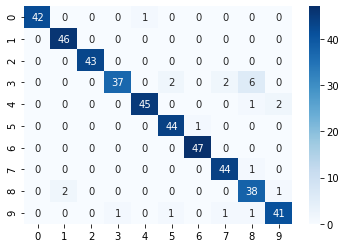

In [112]:
import seaborn as sns
sns.heatmap(confusion_matrix(target,predictions), annot=True, cmap='Blues')

Prediction for test image: [2]


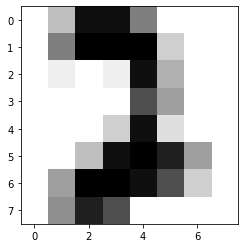

In [113]:
plt.imshow(digits.images[-55], cmap = plt.cm.gray_r, interpolation = "nearest")
print("Prediction for test image:", model.predict(data[-55].reshape(1,-1)))

plt.show()

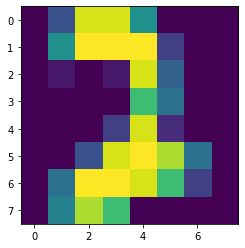

In [114]:
plt.imshow(digits.images[-55])

# Testing svm model with different kernel

In [127]:
# svm_rbf_1 = svm.SVC(kernel='rbf', gamma=0.5, C=0.1)
# svm_rbf_1.fit(data[:trainTestSplit], digits.target[:trainTestSplit])

# svm_poly = svm.SVC(kernel='poly', degree=3, C=1)
# svm_poly.fit(data[:trainTestSplit], digits.target[:trainTestSplit])

# svm_rbf_2 = svm.SVC(kernel='rbf', gamma=0.5, C=1)
# svm_rbf_2.fit(data[:trainTestSplit], digits.target[:trainTestSplit])

# target = digits.target[trainTestSplit:]
# predictions = model.predict(data[trainTestSplit:])

# poly_pred = svm_poly.predict(data[trainTestSplit:])
# rbf_1_pred = svm_rbf_1.predict(data[trainTestSplit:])
# rbf_2_pred = svm_rbf_2.predict(data[trainTestSplit:])

# print(svm_poly)
# print("Accouracy with ", svm_poly , " : ", accuracy_score(target , poly_pred))
# print("Accouracy with ", svm_rbf_1 , " : " , accuracy_score(target , rbf_1_pred) )
# print("Accouracy with ", svm_rbf_2 ,  " : " , accuracy_score(target , rbf_2_pred) )

In [132]:
svm_with_kernel = dict()
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C = 1.0

# svm_with_kernel[''] = svm.SVC()
# svm_with_kernel['linear'] = svm.SVC(kernel='linear', C=C)
# svm_with_kernel['poly'] = svm.SVC(kernel='poly', C=C)
# svm_with_kernel['rbf'] = svm.SVC(kernel='rbf', C=C)
# svm_with_kernel['sigmoid'] = svm.SVC(kernel='sigmoid', C=C)



Initialize SVM model with given kernel

In [137]:
for k in kernels : 
    svm_with_kernel[k] = svm.SVC(kernel = k, C = C)

Train the models with training data

In [133]:
for k in kernels : 
    svm_with_kernel[k].fit(data[:trainTestSplit], digits.target[:trainTestSplit])

predict output 

In [134]:
predictions = dict()
# predictions = model.predict(data[trainTestSplit:])

for k in kernels :
    predictions[k] = svm_with_kernel[k].predict(data[trainTestSplit:])

Evaluate performance of SVM using different kernels

In [139]:
target = digits.target[trainTestSplit:]

for k in kernels :
    print("Accouracy with SVM using ", k  , " kernel : ", accuracy_score(target , predictions[k]))

Accouracy with SVM using  linear  kernel :  0.9288888888888889
Accouracy with SVM using  poly  kernel :  0.9533333333333334
Accouracy with SVM using  rbf  kernel :  0.9488888888888889
Accouracy with SVM using  sigmoid  kernel :  0.8644444444444445


# Resource : 
    
https://scikit-learn.org/stable/modules/svm.html

https://dataaspirant.com/svm-kernels/#t-1608054630737

https://data-flair.training/blogs/svm-kernel-functions

https://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py